In [1]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns

In [2]:
!pip3 install spotipy --user

/bin/sh: 1: pip3: not found


In [3]:
cid = '<INSERT CLIENT ID>'
secret = '<INSERT CLIENT SECRET>'

In [4]:
cid = '1be9accc1f3c4829a2fcc3c757d96bff'
secret = '0c62869c338048378395a751b57270ad'
redirect_uri = "http://localhost:6532"

!export SPOTIPY_CLIENT_ID='1be9accc1f3c4829a2fcc3c757d96bff'
!export SPOTIPY_CLIENT_SECRET='0c62869c338048378395a751b57270ad'
!export SPOTIPY_REDIRECT_URI='http://localhost:6532'

In [5]:
username = "notebook datascience app"

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Get read access to your library
scope = 'user-library-read'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [6]:
df_saved_tracks = pd.DataFrame()
track_list = ''
added_ts_list = []
artist_list = []
title_list = []
more_songs = True
offset_index = 0
while more_songs:
    songs = sp.current_user_saved_tracks(offset=offset_index)
    for song in songs['items']:
        #join track ids to a string for audio_features function
        track_list += song['track']['id'] +','
        #get the time when the song was added
        added_ts_list.append(song['added_at'])
        #get the title of the song
        title_list.append(song['track']['name'])
        #get all the artists in the song
        artists = song['track']['artists']
        artists_name = ''
        for artist in artists:
            artists_name += artist['name']  + ','
        artist_list.append(artists_name[:-1])
    #get the track features and append into a dataframe
    track_features = sp.audio_features(track_list[:-1])
    df_temp = pd.DataFrame(track_features)
    df_saved_tracks = df_saved_tracks.append(df_temp)
    track_list = ''
    if songs['next'] == None:
        # no more songs in playlist
        more_songs = False
    else:
        # get the next n songs
        offset_index += songs['limit']
#include timestamp added, title and artists of a song
df_saved_tracks['added_at'] = added_ts_list
df_saved_tracks['song_title'] = title_list
df_saved_tracks['artists'] = artist_list

In [7]:
df_saved_tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,added_at,song_title,artists
0,0.661,0.765,2,-8.818,1,0.0297,0.0757,0.8010,0.0919,0.2370,...,audio_features,38CngZw3TDi2XDCQPMKHJR,spotify:track:38CngZw3TDi2XDCQPMKHJR,https://api.spotify.com/v1/tracks/38CngZw3TDi2...,https://api.spotify.com/v1/audio-analysis/38Cn...,228293,4,2020-04-07T16:07:14Z,A Sheltered Place - Phaeleh Remix,"Way Out West,Phaeleh"
1,0.728,0.784,8,-12.477,1,0.0414,0.1030,0.8480,0.0858,0.0646,...,audio_features,6YJ9z4IInxfJWsjc6ADtV2,spotify:track:6YJ9z4IInxfJWsjc6ADtV2,https://api.spotify.com/v1/tracks/6YJ9z4IInxfJ...,https://api.spotify.com/v1/audio-analysis/6YJ9...,377919,3,2020-04-07T13:40:07Z,Prelusion,"Mark Tarmonea,Yannek Maunz"
2,0.725,0.742,0,-8.646,1,0.0328,0.0887,0.8100,0.1070,0.0980,...,audio_features,4isQapTCsf1TvF9RkzfrCG,spotify:track:4isQapTCsf1TvF9RkzfrCG,https://api.spotify.com/v1/tracks/4isQapTCsf1T...,https://api.spotify.com/v1/audio-analysis/4isQ...,277073,4,2020-04-07T09:13:47Z,Odyssee - Pt. 2,BLR
3,0.689,0.810,8,-6.621,0,0.0464,0.0203,0.9010,0.1390,0.8630,...,audio_features,0oB0mWnbRYNsC2CicOkXZL,spotify:track:0oB0mWnbRYNsC2CicOkXZL,https://api.spotify.com/v1/tracks/0oB0mWnbRYNs...,https://api.spotify.com/v1/audio-analysis/0oB0...,407803,4,2020-04-06T14:33:04Z,GUFM - Folamour Remix,"Mangabey,Folamour"
4,0.946,0.493,8,-9.654,1,0.0509,0.1620,0.2970,0.0875,0.5920,...,audio_features,0aKoR2iMGuqAUBBCdRwII8,spotify:track:0aKoR2iMGuqAUBBCdRwII8,https://api.spotify.com/v1/tracks/0aKoR2iMGuqA...,https://api.spotify.com/v1/audio-analysis/0aKo...,270000,4,2020-04-04T12:08:27Z,Prettiest Virgin (Radio Edit),Agar Agar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0.692,0.626,11,-11.361,0,0.0637,0.0432,0.7970,0.1100,0.5360,...,audio_features,4bkTaAK3tvBi7M9S6UEyy2,spotify:track:4bkTaAK3tvBi7M9S6UEyy2,https://api.spotify.com/v1/tracks/4bkTaAK3tvBi...,https://api.spotify.com/v1/audio-analysis/4bkT...,353541,4,2016-12-28T16:20:11Z,StillDreaming,Hypnagog
2,0.489,0.571,10,-11.268,0,0.0933,0.1480,0.6660,0.1830,0.4910,...,audio_features,6H0HOzCvYYbzdhhrOVBzxb,spotify:track:6H0HOzCvYYbzdhhrOVBzxb,https://api.spotify.com/v1/tracks/6H0HOzCvYYbz...,https://api.spotify.com/v1/audio-analysis/6H0H...,262139,1,2016-12-28T16:20:11Z,FunkDiddle,Hypnagog
3,0.700,0.581,6,-7.116,1,0.1500,0.3580,0.0539,0.0825,0.6330,...,audio_features,3ndu6BpfkiGE4m0BboNUHv,spotify:track:3ndu6BpfkiGE4m0BboNUHv,https://api.spotify.com/v1/tracks/3ndu6BpfkiGE...,https://api.spotify.com/v1/audio-analysis/3ndu...,277385,4,2016-12-28T14:29:04Z,Tempo,"Ondubground,Biga Ranx"
4,0.638,0.724,6,-7.291,1,0.0270,0.0206,0.5250,0.1390,0.3500,...,audio_features,5MFtsrwzB0SoZzp2QvaSmF,spotify:track:5MFtsrwzB0SoZzp2QvaSmF,https://api.spotify.com/v1/tracks/5MFtsrwzB0So...,https://api.spotify.com/v1/audio-analysis/5MFt...,243016,4,2016-12-28T14:28:35Z,Because,Ondubground


In [ ]:
## Export  to csv

## Digging in the data
let's look at all the existing columns

In [8]:
print(df_saved_tracks.columns.values)

['danceability' 'energy' 'key' 'loudness' 'mode' 'speechiness'
 'acousticness' 'instrumentalness' 'liveness' 'valence' 'tempo' 'type'
 'id' 'uri' 'track_href' 'analysis_url' 'duration_ms' 'time_signature'
 'added_at' 'song_title' 'artists']


In [9]:
interestingColumns = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'added_at']

In [10]:
df_saved_tracks_timeIndex = df_saved_tracks

df_saved_tracks_timeIndex.added_at = pd.to_datetime(df_saved_tracks_timeIndex.added_at)
df_saved_tracks_timeIndex.set_index(df_saved_tracks_timeIndex.added_at)
df_saved_tracks_timeIndex = df_saved_tracks_timeIndex[interestingColumns]
df_saved_tracks_timeIndex.index = df_saved_tracks_timeIndex.added_at
df_saved_tracks_timeIndex

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,added_at
added_at,,,,,,,
2020-04-07 16:07:14+00:00,0.661,0.765,0.0297,0.0757,0.8010,0.0919,2020-04-07 16:07:14+00:00
2020-04-07 13:40:07+00:00,0.728,0.784,0.0414,0.1030,0.8480,0.0858,2020-04-07 13:40:07+00:00
2020-04-07 09:13:47+00:00,0.725,0.742,0.0328,0.0887,0.8100,0.1070,2020-04-07 09:13:47+00:00
2020-04-06 14:33:04+00:00,0.689,0.810,0.0464,0.0203,0.9010,0.1390,2020-04-06 14:33:04+00:00
2020-04-04 12:08:27+00:00,0.946,0.493,0.0509,0.1620,0.2970,0.0875,2020-04-04 12:08:27+00:00
...,...,...,...,...,...,...,...
2016-12-28 16:20:11+00:00,0.692,0.626,0.0637,0.0432,0.7970,0.1100,2016-12-28 16:20:11+00:00
2016-12-28 16:20:11+00:00,0.489,0.571,0.0933,0.1480,0.6660,0.1830,2016-12-28 16:20:11+00:00
2016-12-28 14:29:04+00:00,0.700,0.581,0.1500,0.3580,0.0539,0.0825,2016-12-28 14:29:04+00:00


In [11]:
testColumns = ['danceability', 'energy', 'speechiness']

In [12]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(16, 4)})

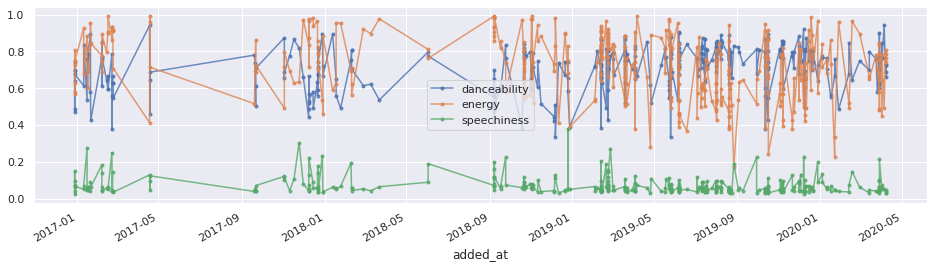

In [13]:
df_saved_tracks_timeIndex[testColumns].plot(marker='.', alpha=0.8)

This is probably not the best way to plot the dataset